In [1]:
import pandas as pd 
import numpy as np 
from FileOpener.CSVReader.CSVReader import CSVReader as csv
import matplotlib.pyplot as plt

%matplotlib inline

In [34]:
import matplotlib as mpl

mpl.rcParams.update({'font.size': 22})

In [2]:
directory = 'CSVFile/Price/Korea/Stocks'

kse_open = csv.price_reader('KOSPI_FROM_1998_open.csv', directory)
kse_close = csv.price_reader('KOSPI_FROM_1998_close.csv', directory)

## 시가 배팅

전일가: 당일시가 <br>
당일가: 당일종가

In [3]:
kse_open_rt = kse_close.div(kse_open)
kse_open_rt[kse_open_rt > 1.3] = 1.3

## 종가 배팅

전일가: 전일종가 <br>
당일가: 당일시가

In [4]:
kse_close_rt = kse_open.div(kse_close.shift(1))
kse_close_rt[kse_close_rt > 1.3] = 1.3

In [5]:
from FileOpener.backtester import PfAnalysis

In [6]:
KOSPI_open = PfAnalysis(kse_open_rt.mean(axis=1).sub(1))
KOSPI_close = PfAnalysis(kse_close_rt.mean(axis=1).sub(1))

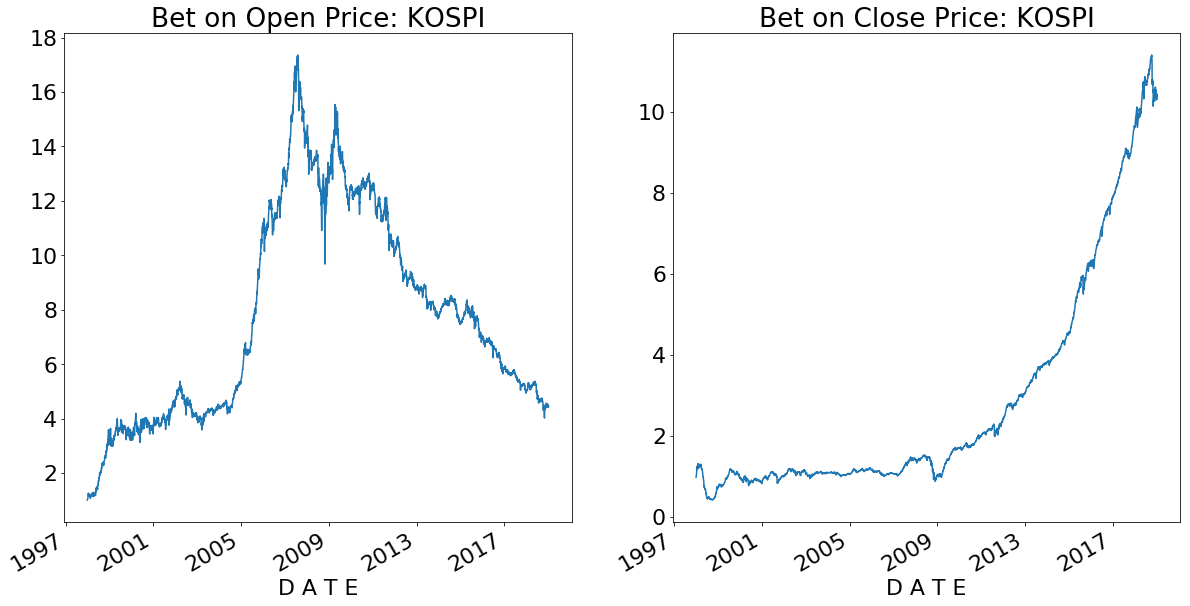

In [39]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2)
fig.set_size_inches((20,10))
ax1.set_title('Bet on Open Price: KOSPI')
ax2.set_title('Bet on Close Price: KOSPI')
KOSPI_open.cumReturn().plot(ax=ax1)
KOSPI_close.cumReturn().plot(ax=ax2)

In [24]:
print(f"CAGR for Open price bet on KOSPI: {round(KOSPI_open.cagr()* 100, 2)}%")
print(f"CAGR for Open price bet on KOSDAQ: {round(KOSPI_close.cagr()* 100, 2)}%")

CAGR for Open price bet on KOSPI: 7.38%
CAGR for Open price bet on KOSDAQ: 11.79%


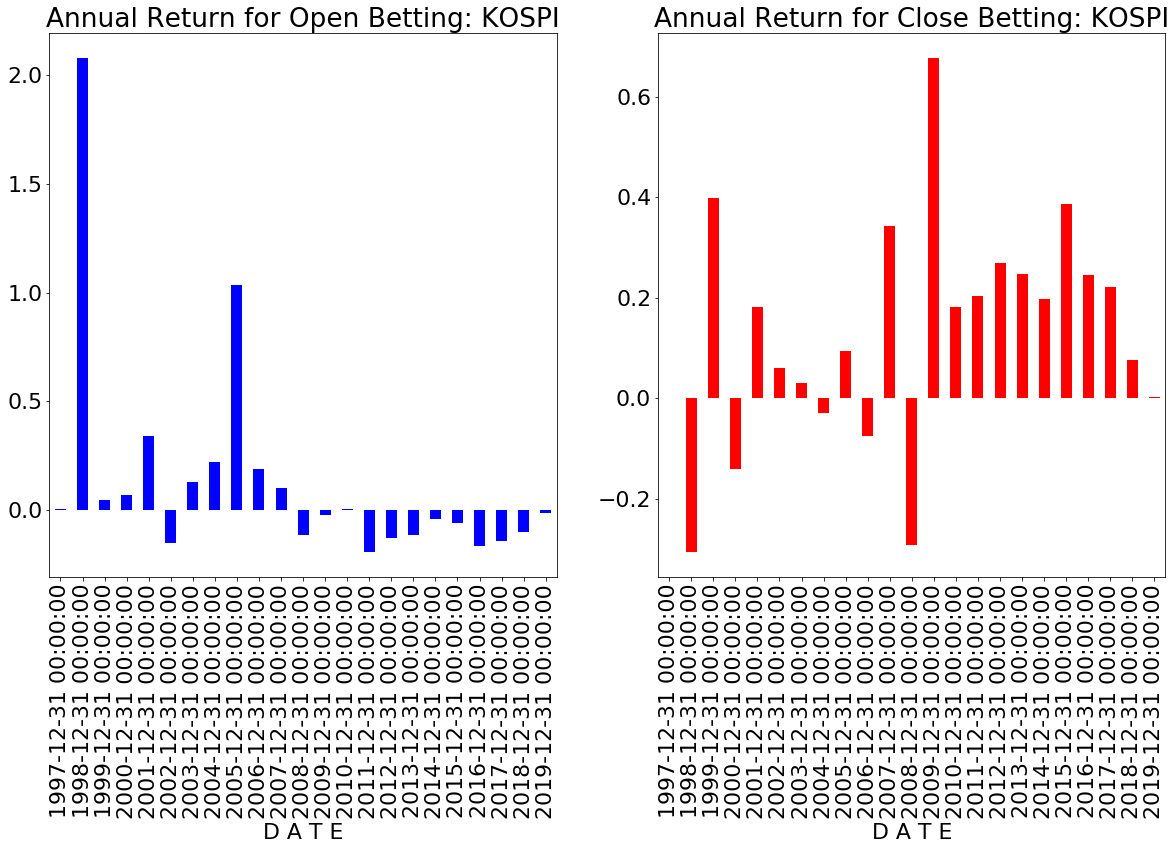

In [41]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2)
fig.set_size_inches((20,10))

ax1.set_title('Annual Return for Open Betting: KOSPI')
ax2.set_title('Annual Return for Close Betting: KOSPI')
KOSPI_open.freqReturn().plot(kind='bar', ax=ax1, color='blue')
KOSPI_close.freqReturn().plot(kind='bar', ax=ax2, color='red')

In [12]:
kdq_open = csv.price_reader('KOSDAQ_FROM_1998_open.csv', directory)
kdq_close = csv.price_reader('KOSDAQ_FROM_1998_close.csv', directory)

In [14]:
kdq_open_rt = kdq_close.div(kdq_open)
kdq_close_rt = kdq_open.div(kdq_close.shift(1))
kdq_close_rt[kdq_close_rt > 1.3] = 1.3
kdq_open_rt[kdq_open_rt > 1.3] = 1.3

In [15]:
KOSDAQ_open = PfAnalysis(kdq_open_rt.mean(axis=1).sub(1))
KOSDAQ_close = PfAnalysis(kdq_close_rt.mean(axis=1).sub(1))

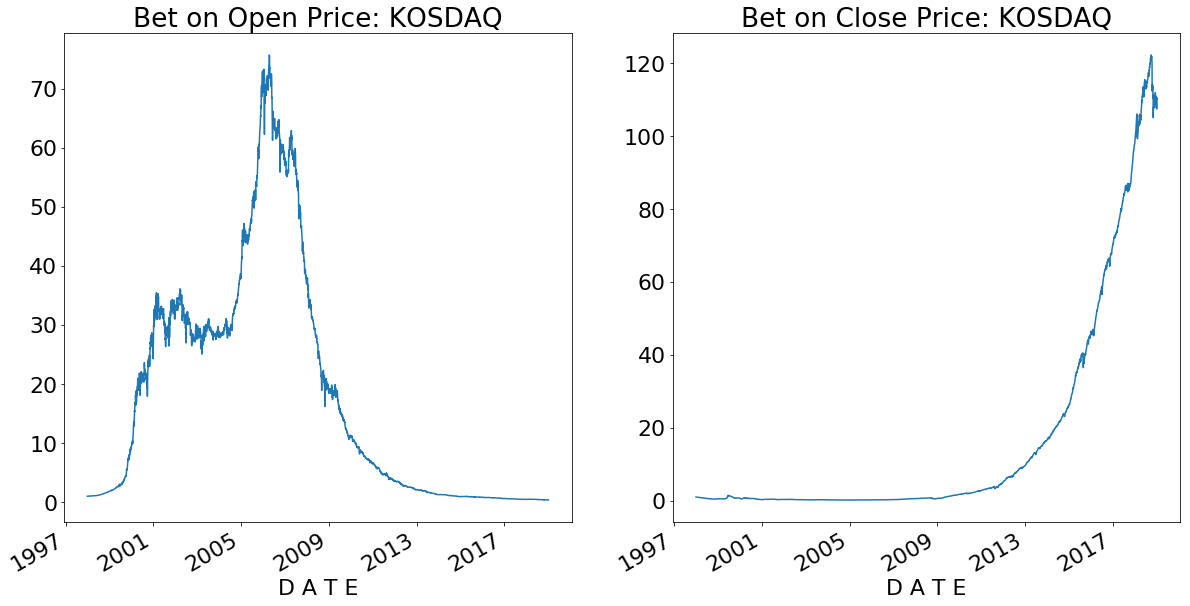

In [40]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2)
fig.set_size_inches((20,10))
ax1.set_title('Bet on Open Price: KOSDAQ')
ax2.set_title('Bet on Close Price: KOSDAQ')
KOSDAQ_open.cumReturn().plot(ax=ax1)
KOSDAQ_close.cumReturn().plot(ax=ax2)

In [26]:
print(f"CAGR for Open price bet on KOSPI: {round(KOSDAQ_open.cagr()* 100, 2)}%")
print(f"CAGR for Open price bet on KOSPI: {round(KOSDAQ_close.cagr()* 100, 2)}%")

CAGR for Open price bet on KOSPI: -4.39%
CAGR for Open price bet on KOSPI: 25.09%


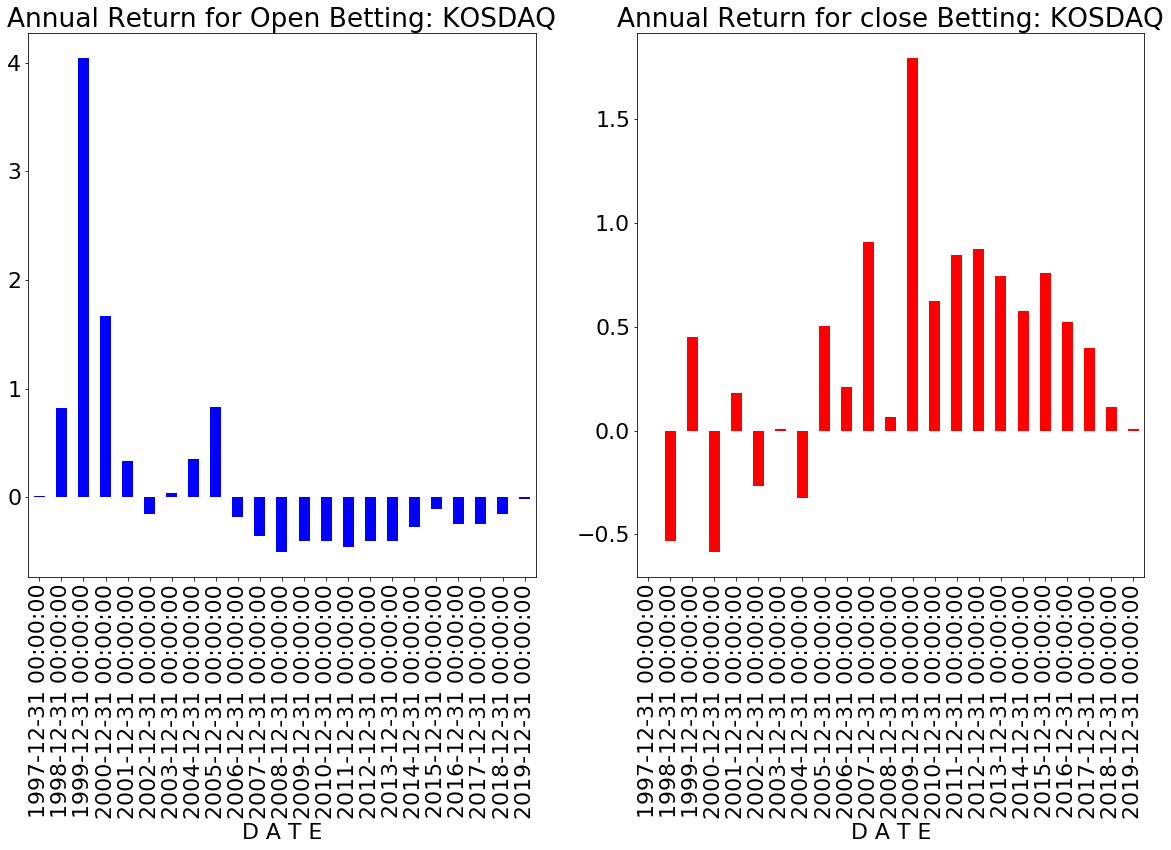

In [38]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2)
fig.set_size_inches((20,10))

ax1.set_title('Annual Return for Open Betting: KOSDAQ')
ax2.set_title('Annual Return for close Betting: KOSDAQ')
KOSDAQ_open.freqReturn().plot(kind='bar', ax=ax1, color='blue')
KOSDAQ_close.freqReturn().plot(kind='bar', ax=ax2, color='red')

In [19]:
kse_close_rt.mean(axis=1).prod() - 1

91.49223400663874

92.49223400663874